# Ames Housing Price Prediction Analysis

## Overview

This notebook aims to analyze the Ames Housing dataset and build predictive models for housing prices. The notebook is organized into several sections, each focusing on a different aspect of the data analysis and modeling process. The primary goal is to provide a comprehensive understanding of the factors influencing house prices and to develop robust predictive models.

### Data Preparation
Data preparation involves handling missing values, encoding categorical variables, and selecting relevant features for modeling.

1. **Handling Missing Values**: Missing data is imputed using appropriate strategies to ensure completeness of the dataset.
2. **Encoding Categorical Variables**: Categorical variables are encoded using one-hot encoding to make them suitable for modeling.
3. **Feature Selection**: Relevant features are selected based on their importance and correlation with the target variable, SalePrice.

### Univariate Analysis
Univariate analysis focuses on the distribution and characteristics of individual variables.

1. **Histograms**: Histograms are used to visualize the distribution of numerical features.
2. **Box Plots**: Box plots are used to identify outliers and understand the spread of numerical features.

### Bivariate Analysis
Bivariate analysis explores the relationships between pairs of variables.

1. **Correlation Heatmap**: A heatmap of the correlation matrix is used to identify strong relationships between features and the target variable.
2. **Scatter Plots**: Scatter plots are used to visualize the relationships between selected features and SalePrice.

### Multivariate Analysis
Multivariate analysis examines the relationships between multiple variables simultaneously to identify patterns and interactions that may not be evident in univariate or bivariate analyses.

### Baseline Linear Regression Models
Baseline linear regression models are built to understand the linear relationships between selected features and SalePrice.

### Advanced Regression Analysis
Advanced regression techniques are employed to improve the predictive performance of the models.

1. **Ridge Regression**: A regularized regression technique to handle multicollinearity and prevent overfitting.
2. **Lasso Regression**: Another regularized regression technique that performs feature selection by shrinking some coefficients to zero.
3. **ElasticNet Regression**: A combination of Ridge and Lasso regression that balances their strengths.

### Model Training and Validation
Various machine learning models are trained and validated to predict housing prices.

1. **Support Vector Regression (SVR)**: A robust regression technique that aims to minimize prediction errors.
2. **Artificial Neural Networks (ANN)**: A deep learning approach that captures complex patterns in the data.
3. **XGBoost**: An ensemble learning method that builds multiple weak learners to create a strong predictive model.

### Ensemble Modeling
Ensemble modeling combines multiple models to improve overall prediction accuracy.

1. **Stacking Models**: Different models are stacked to leverage their individual strengths.
2. **Blending Models**: Predictions from multiple models are blended to achieve better performance.

### Prediction
The final models are used to make predictions on the test data, and the results are evaluated to determine the best-performing model.

## Goals
- **Identify Key Features**: Determine the most important features influencing housing prices.
- **Build Robust Models**: Develop and validate different regression models to accurately predict housing prices.
- **Improve Predictive Accuracy**: Use advanced techniques and ensemble methods to enhance the performance of the predictive models.

This analysis will provide insights into the factors affecting housing prices in Ames and demonstrate the application of various machine learning techniques to build effective predictive models.


In [112]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tensorflow import keras
from keras import layers
from keras import models
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [113]:
# Load the Ames dataset
file_path = '../data/AmesData.csv'
ames_df = pd.read_csv(file_path)

# Display the first few rows of the Ames dataset
print("First few rows of the Ames dataset:")
print(ames_df.head())

# Display summary statistics of the Ames dataset
print("\nSummary statistics of the Ames dataset:")
print(ames_df.describe())

# List the column names of the Ames dataset
print("\nColumn names of the Ames dataset:")
print(ames_df.columns.tolist())

# Split the data into training and testing sets
train_df, test_df = train_test_split(ames_df, test_size=0.2, random_state=42)

# Display the first few rows of the training set
print("\nFirst few rows of the training set:")
print(train_df.head())

# Display the first few rows of the testing set
print("\nFirst few rows of the testing set:")
print(test_df.head())


First few rows of the Ames dataset:
   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0         120       FV            0     3830   Pave  Pave      IR1   
1         120       FV            0     4217   Pave  Pave      IR1   
2         120       FV            0     4538   Pave   NaN      IR1   
3         120       FV            0     4765   Pave   NaN      IR1   
4         120       FV           25     4835   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub   CulDSac  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      1    200

In [114]:
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2200.000000,2215.000000,2215.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,56.256769,57.851083,10254.244585,6.176895,5.589350,1972.787004,1985.001805,105.606364,447.184650,52.968397,...,94.172383,48.583484,22.800090,2.489170,17.340704,2.203971,48.988718,6.234657,2007.791516,185229.945848
std,41.092446,33.332384,7949.356701,1.363943,1.076804,29.581654,20.630009,181.472466,442.528602,175.160502,...,126.382022,67.003044,64.736537,24.900178,59.097080,35.238406,526.443442,2.661317,1.312499,79889.630323
min,20.000000,0.000000,1300.000000,1.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,43.000000,7500.000000,5.000000,5.000000,1955.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.750000,2007.000000,132000.000000
50%,50.000000,63.000000,9525.000000,6.000000,5.000000,1976.000000,1994.000000,0.000000,379.000000,0.000000,...,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165450.000000
75%,70.000000,79.000000,11643.500000,7.000000,6.000000,2001.000000,2004.000000,172.000000,734.000000,0.000000,...,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,216877.750000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2288.000000,1474.000000,...,1424.000000,570.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000,755000.000000


In [115]:
# Get the number of rows and columns in the Ames dataset
num_rows, num_columns = ames_df.shape

print(f"The dataset contains {num_rows} rows and {num_columns} columns.")

The dataset contains 2771 rows and 80 columns.


In [117]:
# Print the column names of the Ames dataset
print("Column names of the Ames dataset:")
print(ames_df.columns.tolist())

Column names of the Ames dataset:
['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'Screen

In [118]:
# Print the column names of the Ames dataset in groups of 5
columns = ames_df.columns.tolist()
print("Column names of the Ames dataset:")

for i in range(0, len(columns), 5):
    print(columns[i:i+5])

Column names of the Ames dataset:
['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street']
['Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig']
['LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType']
['HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd']
['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType']
['MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual']
['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2']
['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC']
['CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF']
['GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']
['BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional']
['Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish']
['GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive']
['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPo

#### 2. Basic Statistical Analysis

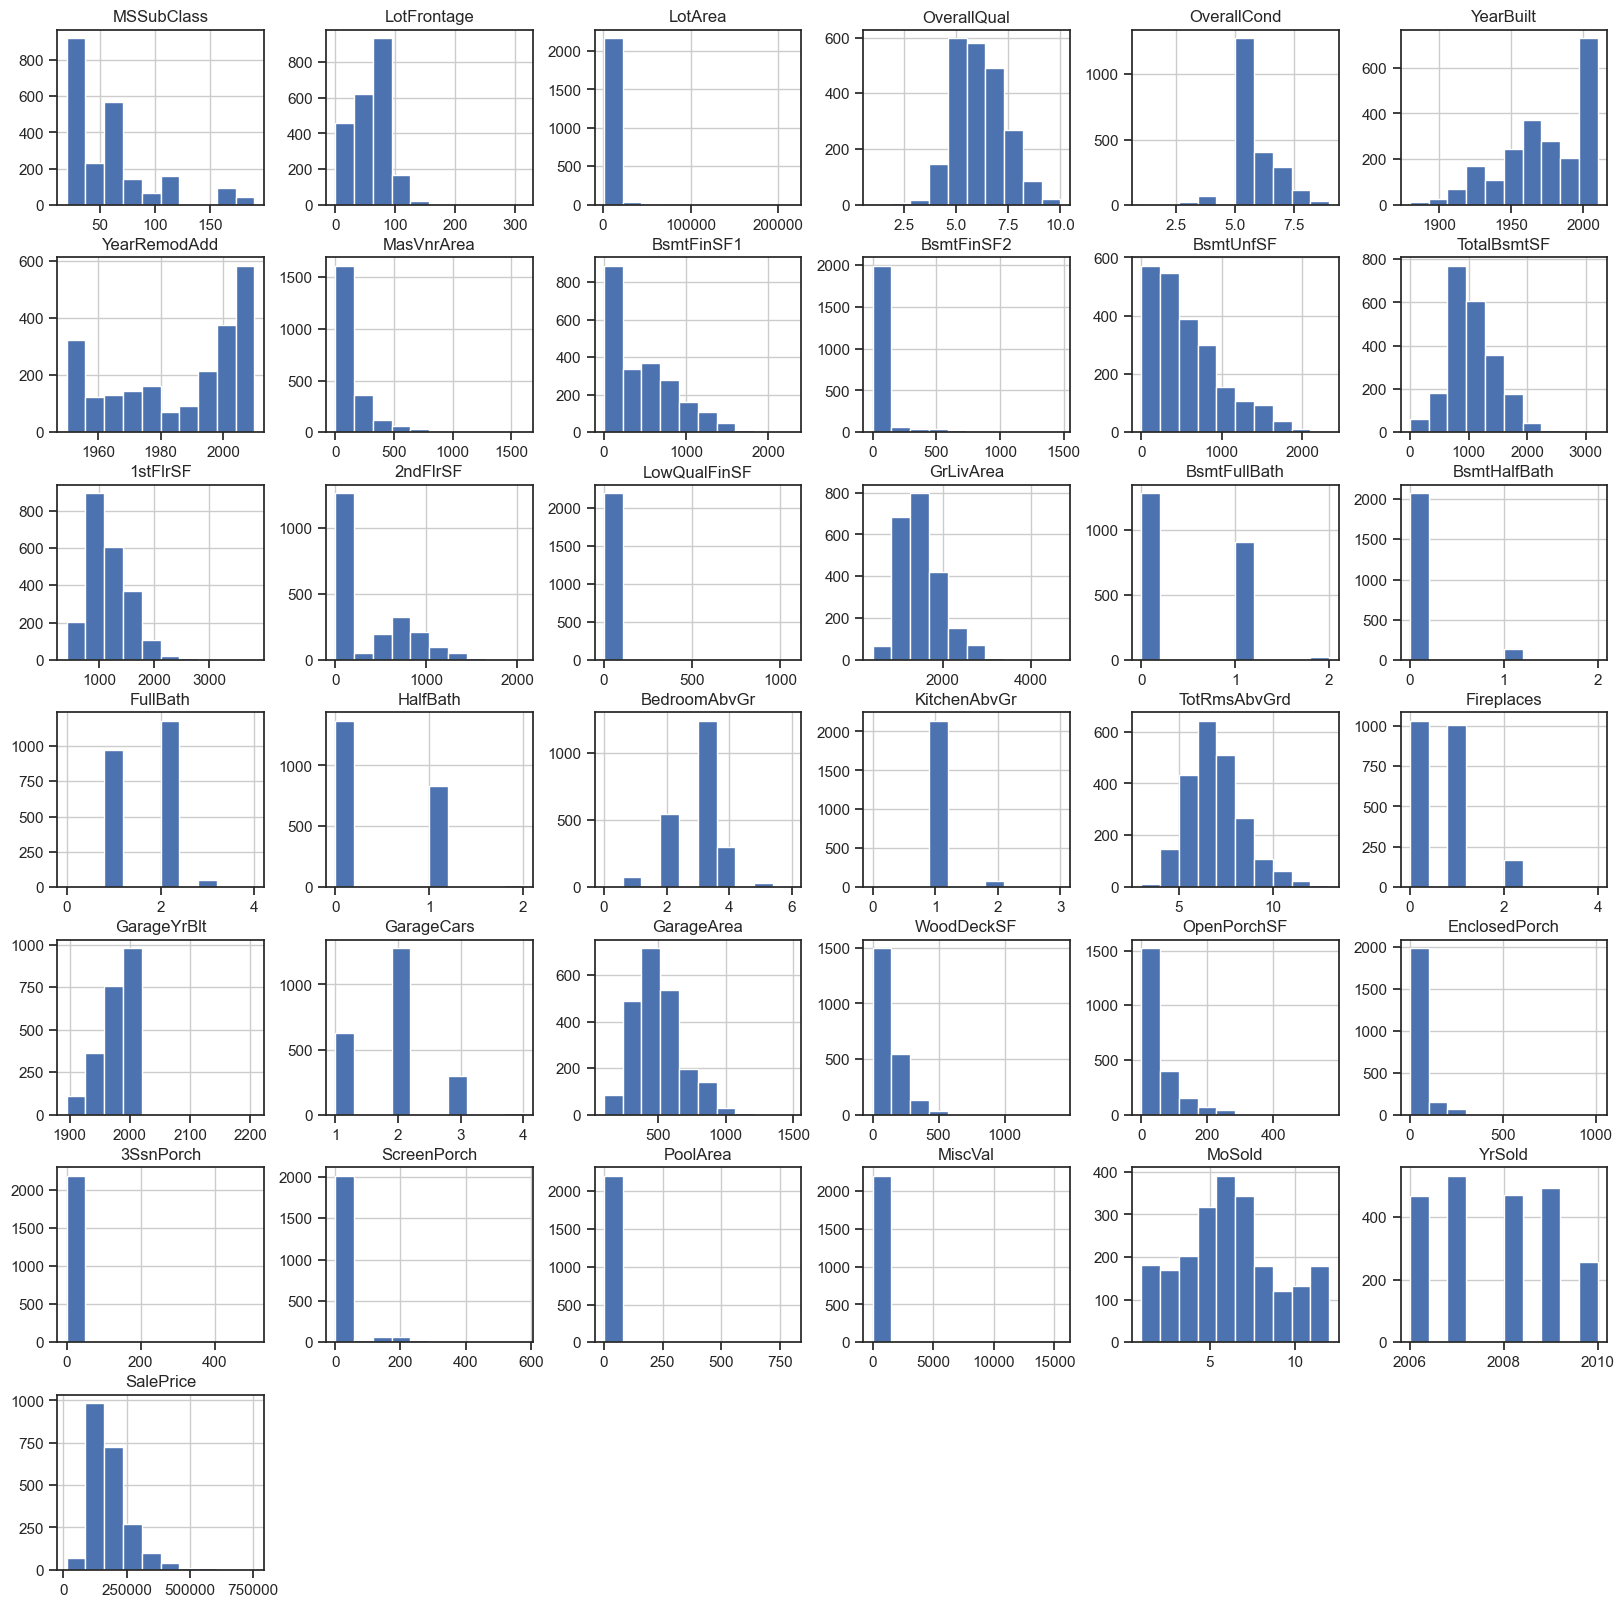

In [119]:
# Histograms for key features
train_df.hist(figsize=(20, 20))  # create histograms for all numerical features in the dataset
plt.show()                       # display the plots

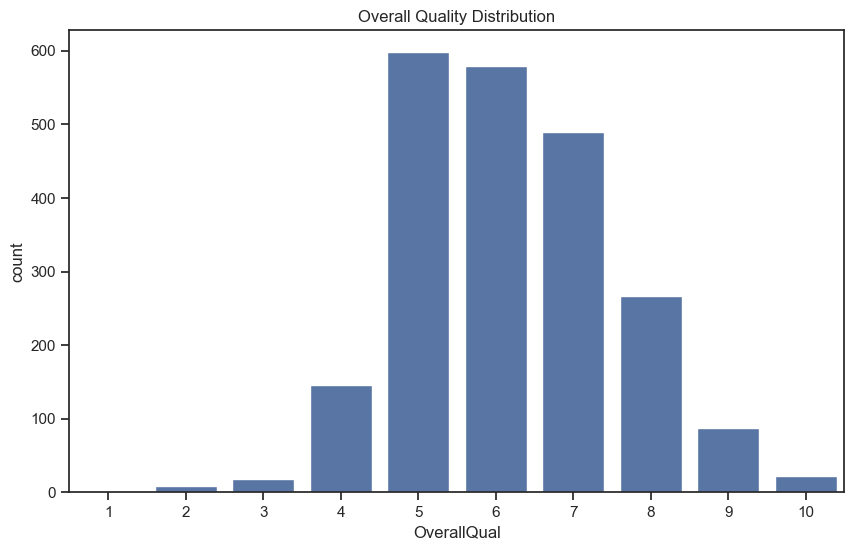

In [101]:
# Bar plot of overall quality
plt.figure(figsize=(10, 6))  # set the figure size
sns.countplot(x='OverallQual', data=train_df)  # create a count plot for the OverallQual column
plt.title('Overall Quality Distribution')  # add a title to the plot
plt.show()  # display the plot

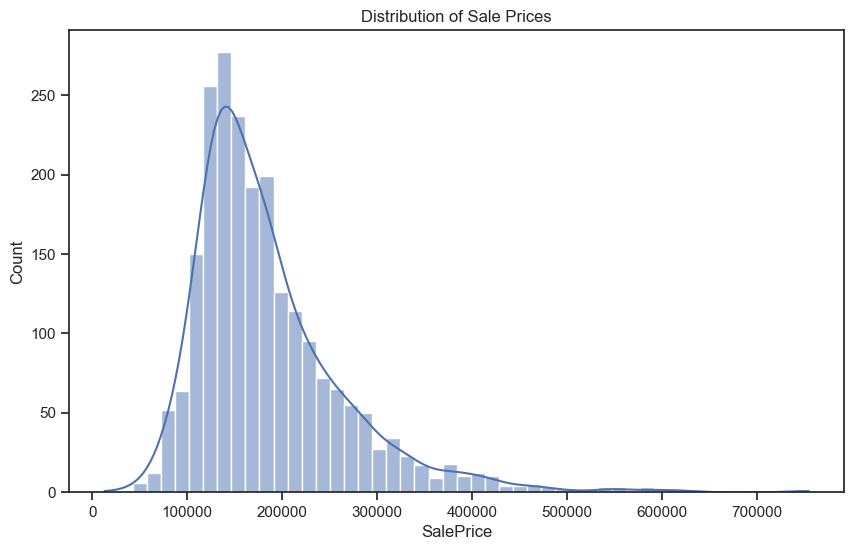

In [102]:
# Distribution of sale prices
plt.figure(figsize=(10, 6))  # set the figure size
sns.histplot(train_df['SalePrice'], bins=50, kde=True)  # create a histogram with a kernel density estimate for the SalePrice column
plt.title('Distribution of Sale Prices')  # add a title to the plot
plt.show()  # display the plot

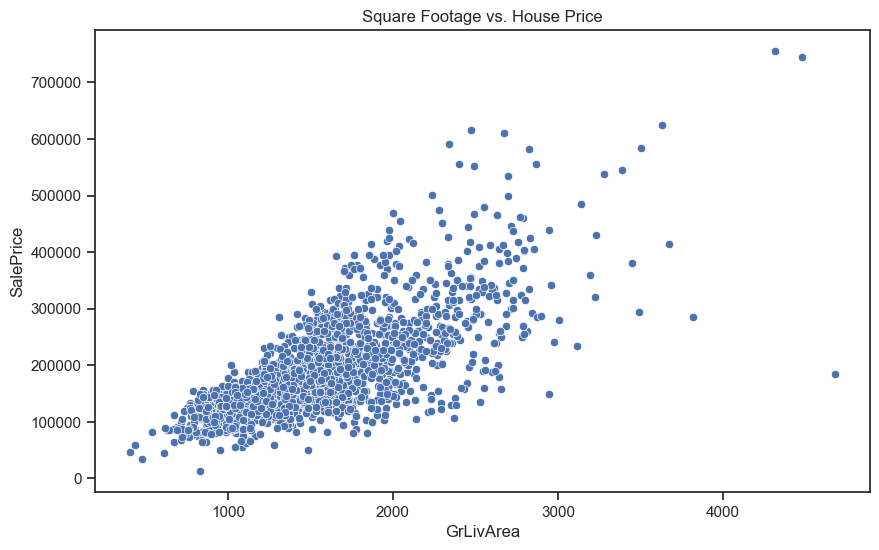

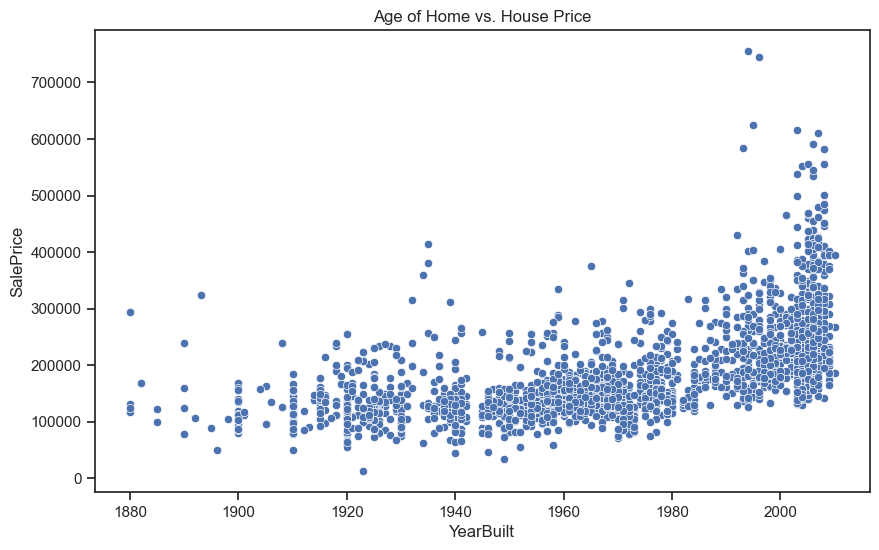

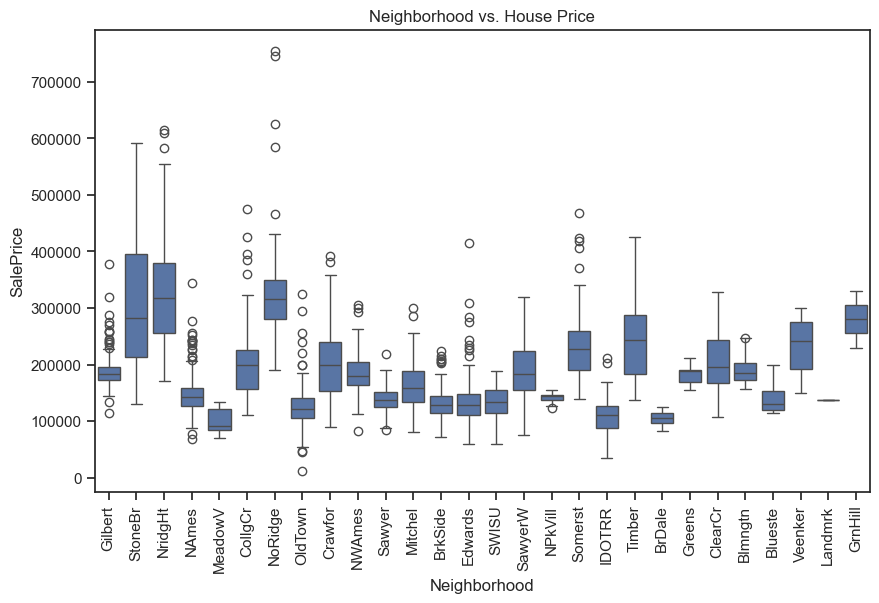

In [103]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Scatter plot of square footage vs. house price
plt.figure(figsize=(10, 6))  # Set the figure size
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df)  # Create a scatter plot for square footage (GrLivArea) vs. house price (SalePrice)
plt.title('Square Footage vs. House Price')  # Add a title to the plot
plt.show()  # Display the plot

# Scatter plot of age of home vs. house price
plt.figure(figsize=(10, 6))  # Set the figure size
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train_df)  # Create a scatter plot for the age of home (YearBuilt) vs. house price (SalePrice)
plt.title('Age of Home vs. House Price')  # Add a title to the plot
plt.show()  # Display the plot

# Scatter plot of neighborhood vs. house price
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_df)  # Create a box plot for neighborhood (Neighborhood) vs. house price (SalePrice)
plt.title('Neighborhood vs. House Price')  # Add a title to the plot
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees for better readability
plt.show()  # Display the plot


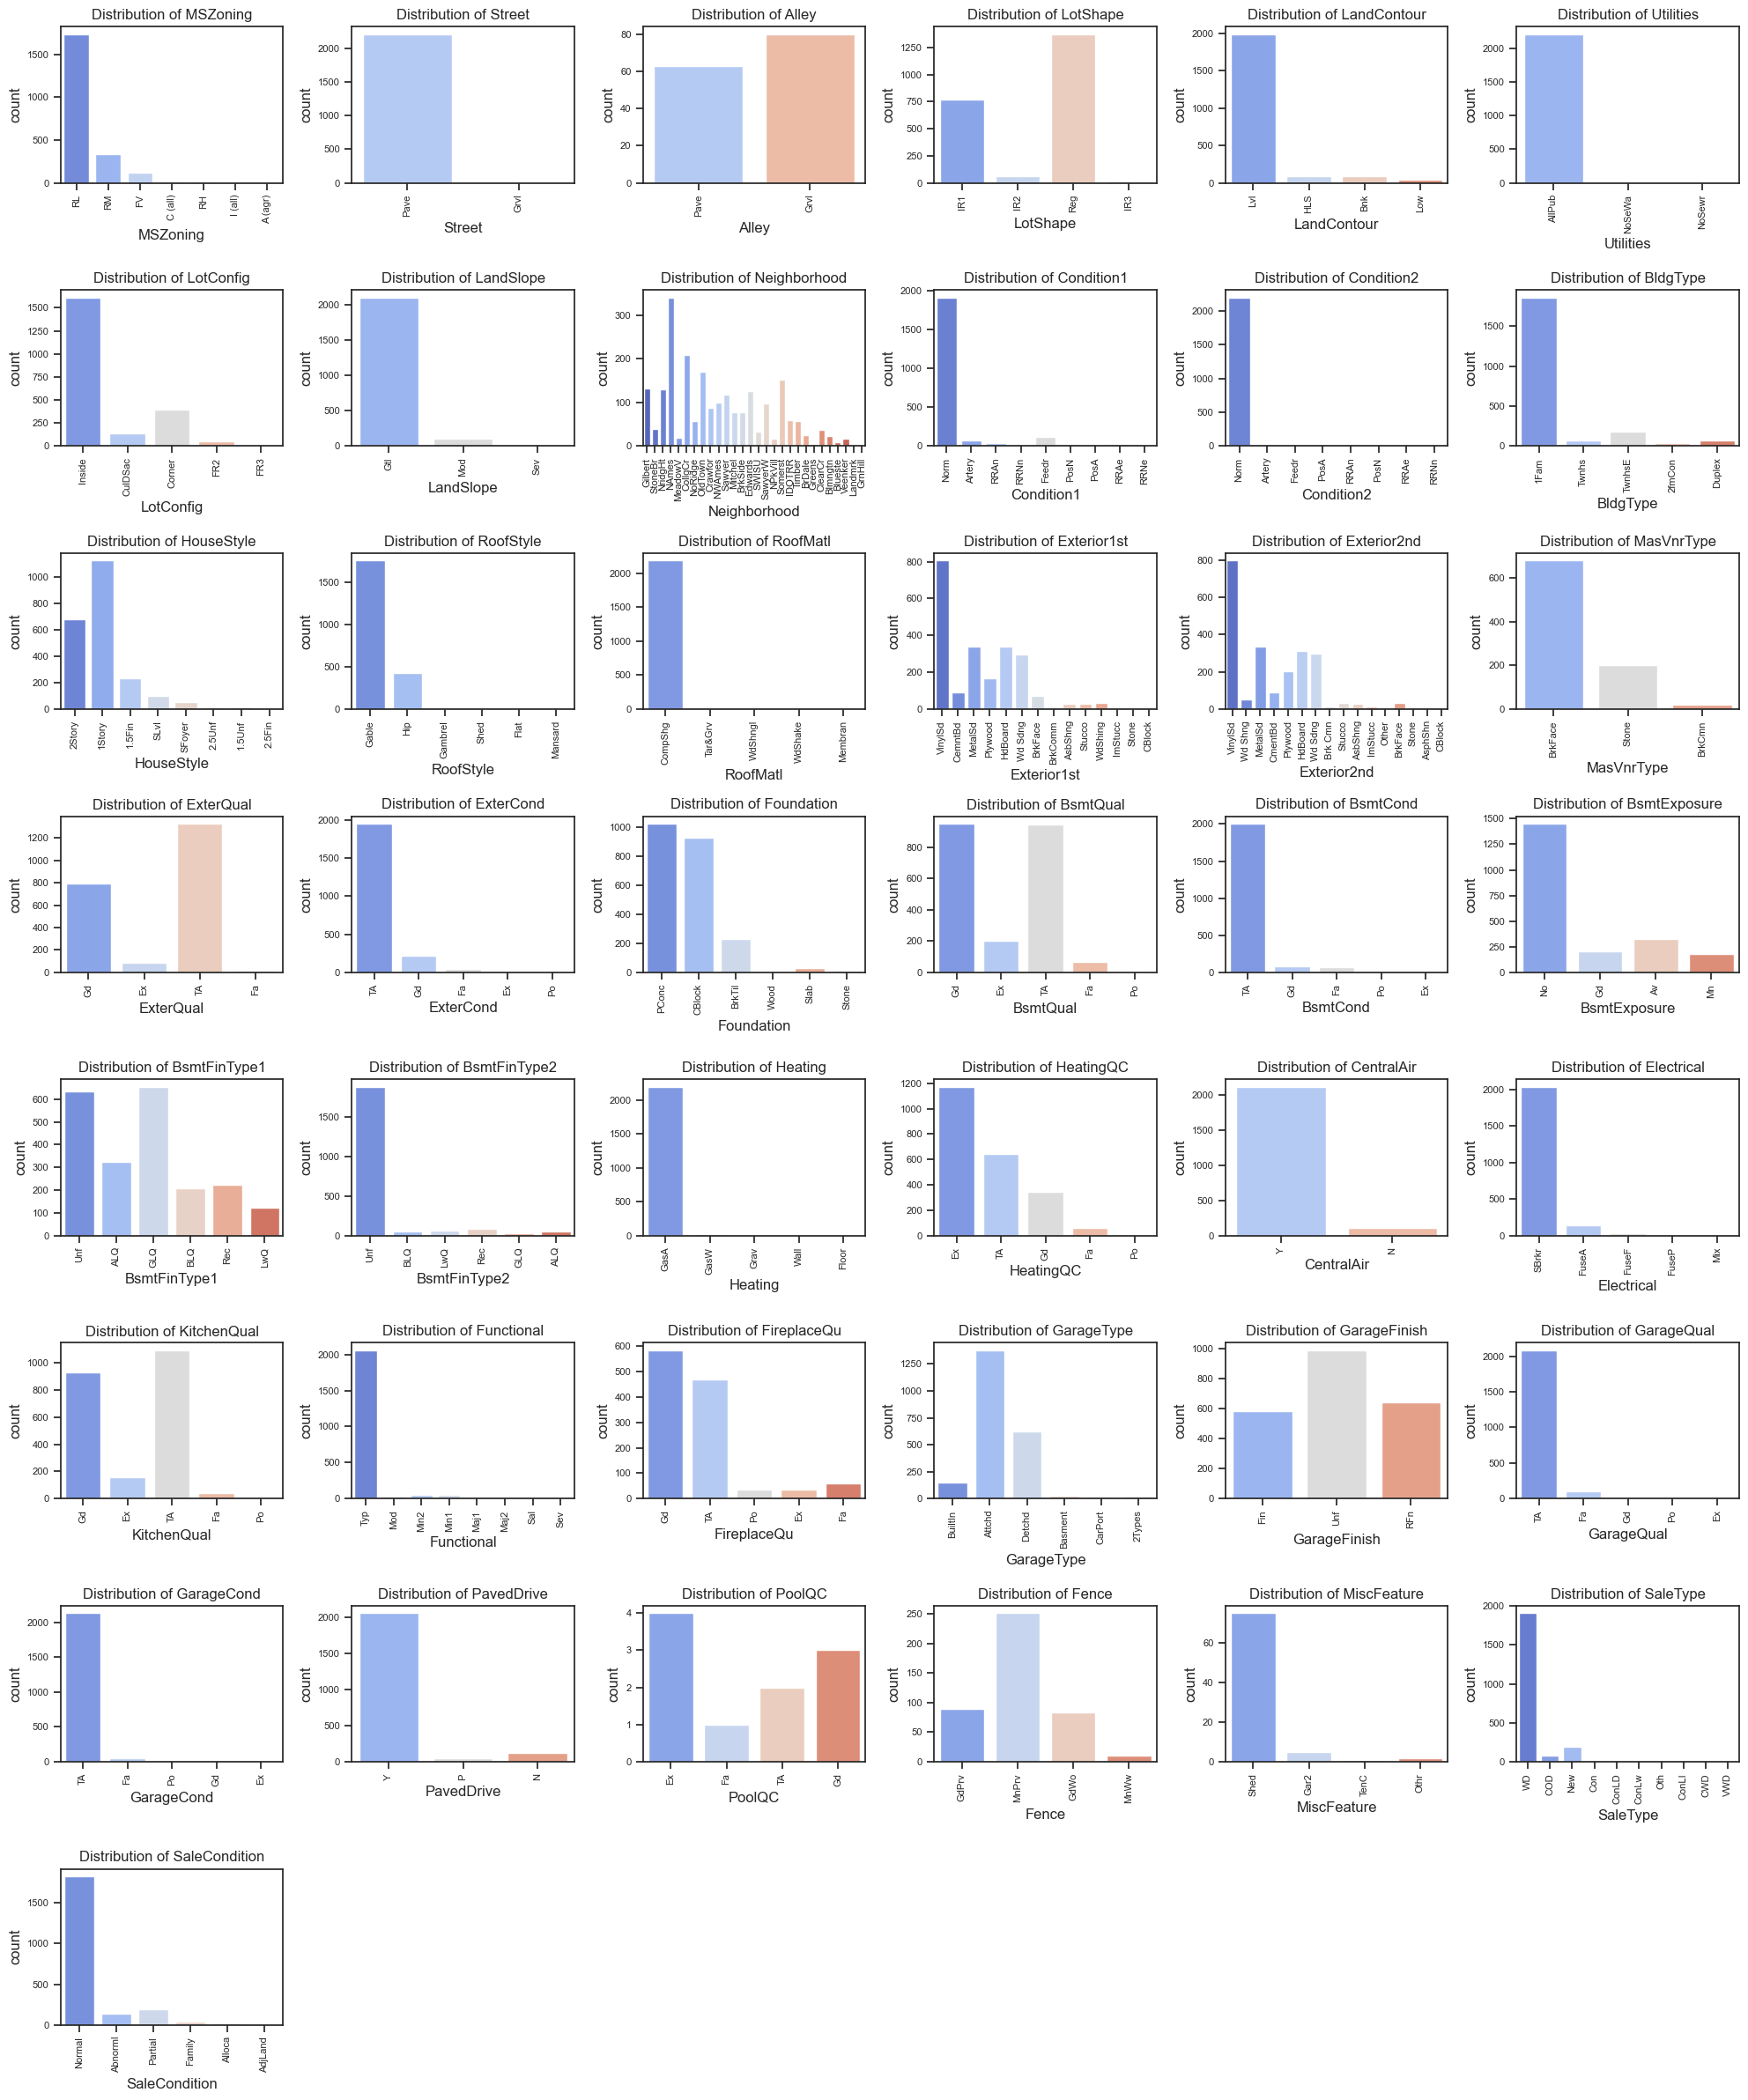

In [104]:
# Select only categorical columns
categorical_cols = train_df.select_dtypes(exclude=[np.number]).columns.tolist()

# Determine the number of rows and columns for the subplot grid
n_cols = 6
n_rows = len(categorical_cols) // n_cols + (len(categorical_cols) % n_cols > 0)

# Plot count plots for categorical features
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 3))
axes = axes.flatten()

for i, feature in enumerate(categorical_cols):
    sns.countplot(x=train_df[feature], ax=axes[i], hue=train_df[feature], palette="coolwarm", dodge=False, legend=False)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].tick_params(axis='x', rotation=90, labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

# Remove any unused subplots
for ax in axes[len(categorical_cols):]:
    ax.remove()

plt.tight_layout()
plt.show()

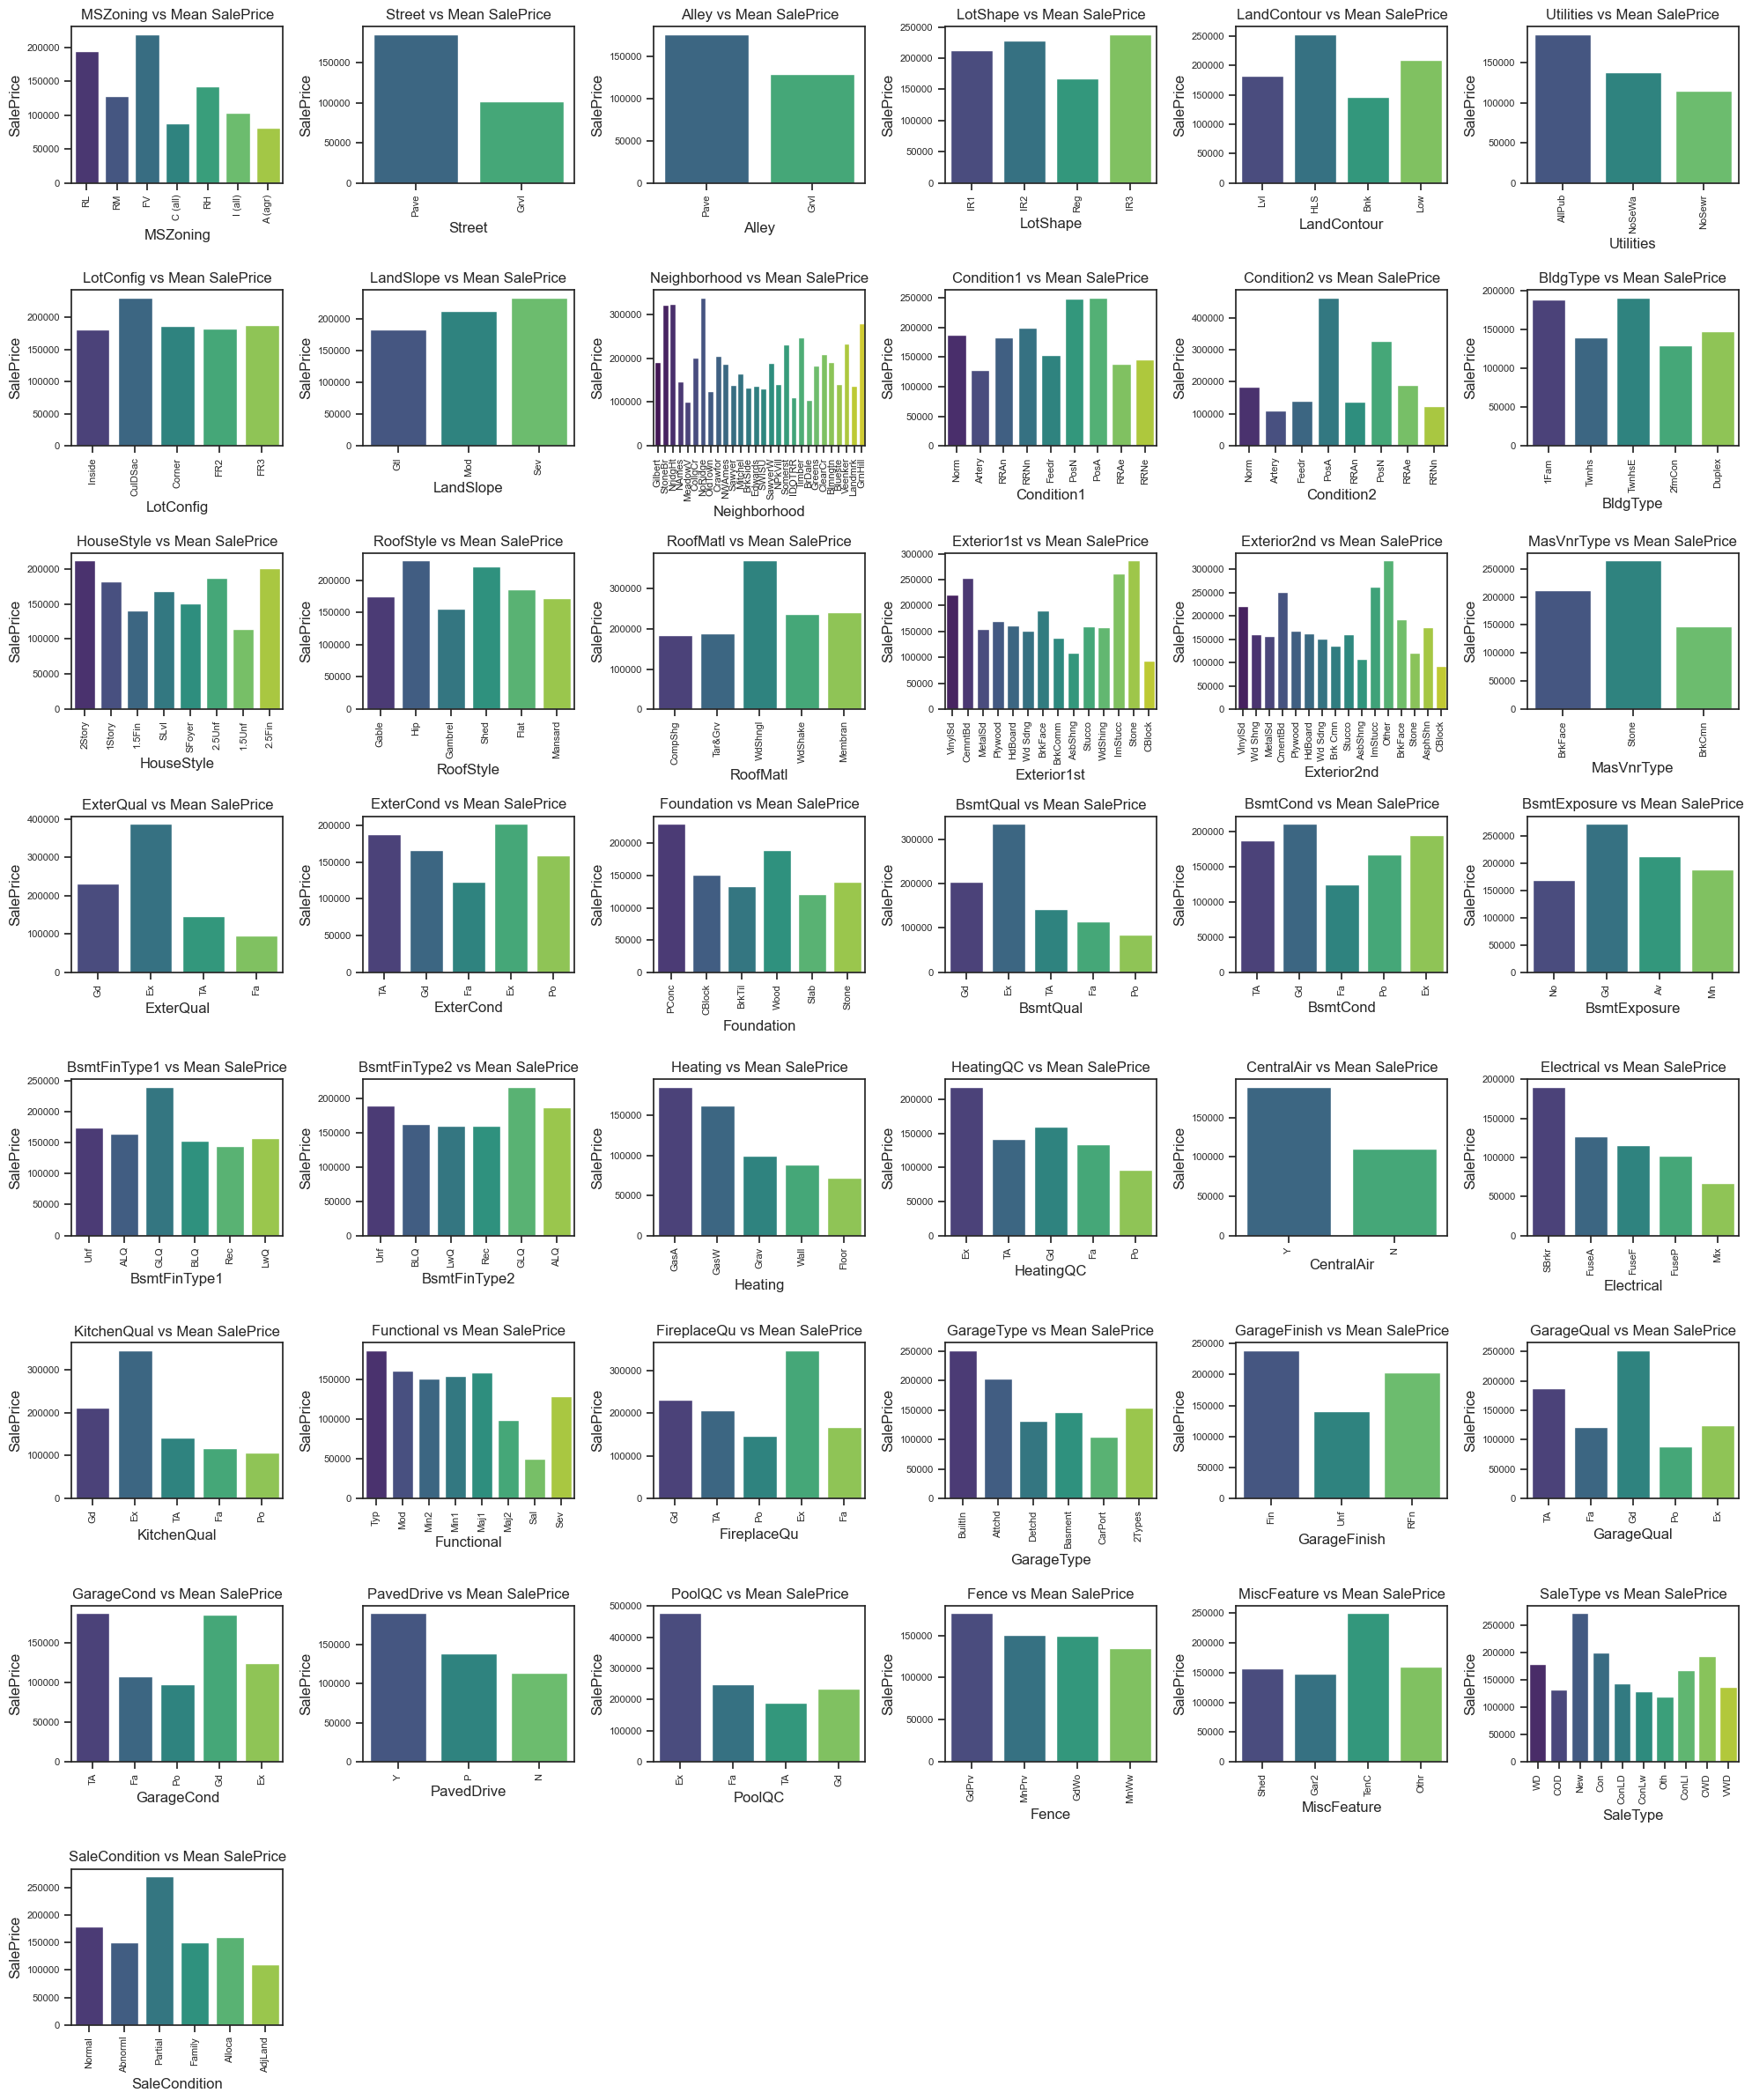

In [105]:
# Plot bar plots for categorical features against mean SalePrice
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 3))
axes = axes.flatten()

for i, feature in enumerate(categorical_cols):
    sns.barplot(x=train_df[feature], y=train_df['SalePrice'], ax=axes[i], errorbar=None, hue=train_df[feature], palette="viridis", dodge=False, legend=False)
    axes[i].set_title(f'{feature} vs Mean SalePrice')
    axes[i].tick_params(axis='x', rotation=90, labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

# Remove any unused subplots
for ax in axes[len(categorical_cols):]:
    ax.remove()

plt.tight_layout()
plt.show()

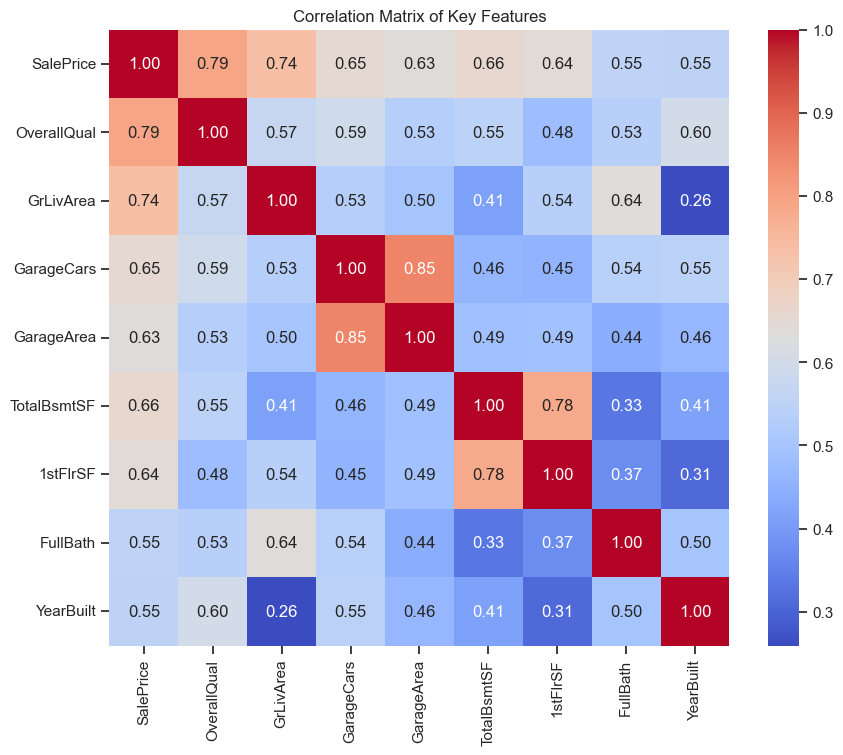

In [106]:
# Select only numeric columns
numeric_cols = train_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

# Select key features for correlation analysis
key_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt']

# Filter the correlation matrix for the key features
key_correlation_matrix = correlation_matrix.loc[key_features, key_features]

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(key_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Features')
plt.show()


In [107]:
# Select only numeric columns
numeric_cols = train_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

# Display the first few rows of the correlation matrix to ensure it's calculated correctly
print("Correlation Matrix:")
correlation_matrix.head()

Correlation Matrix:


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.247561,-0.220437,0.061559,-0.099748,0.070770,0.046095,0.018106,-0.045718,-0.075538,...,-0.015250,-0.022243,-0.033348,-0.032727,-0.047901,0.010663,-0.037554,0.003082,-0.018327,-0.070959
LotFrontage,-0.247561,1.000000,0.112932,0.139197,-0.027503,0.027274,0.070660,0.106216,0.048451,0.020110,...,0.008444,0.081087,0.026271,0.006906,0.033035,0.063666,-0.030007,0.015693,-0.013186,0.220108
LotArea,-0.220437,0.112932,1.000000,0.085316,-0.035257,0.006392,0.014719,0.125232,0.159729,0.094609,...,0.114325,0.096175,0.030378,0.018643,0.052680,0.051617,0.033651,-0.006853,-0.022285,0.276681
OverallQual,0.061559,0.139197,0.085316,1.000000,-0.160467,0.599042,0.558439,0.421575,0.259348,-0.066468,...,0.227118,0.288365,-0.116923,0.020608,0.022166,0.037526,-0.023617,0.027364,-0.003348,0.794565
OverallCond,-0.099748,-0.027503,-0.035257,-0.160467,1.000000,-0.428693,0.005216,-0.154379,-0.078075,0.044250,...,0.011375,-0.104812,0.081896,0.030580,0.042149,-0.021064,0.052858,0.011270,0.035547,-0.146639


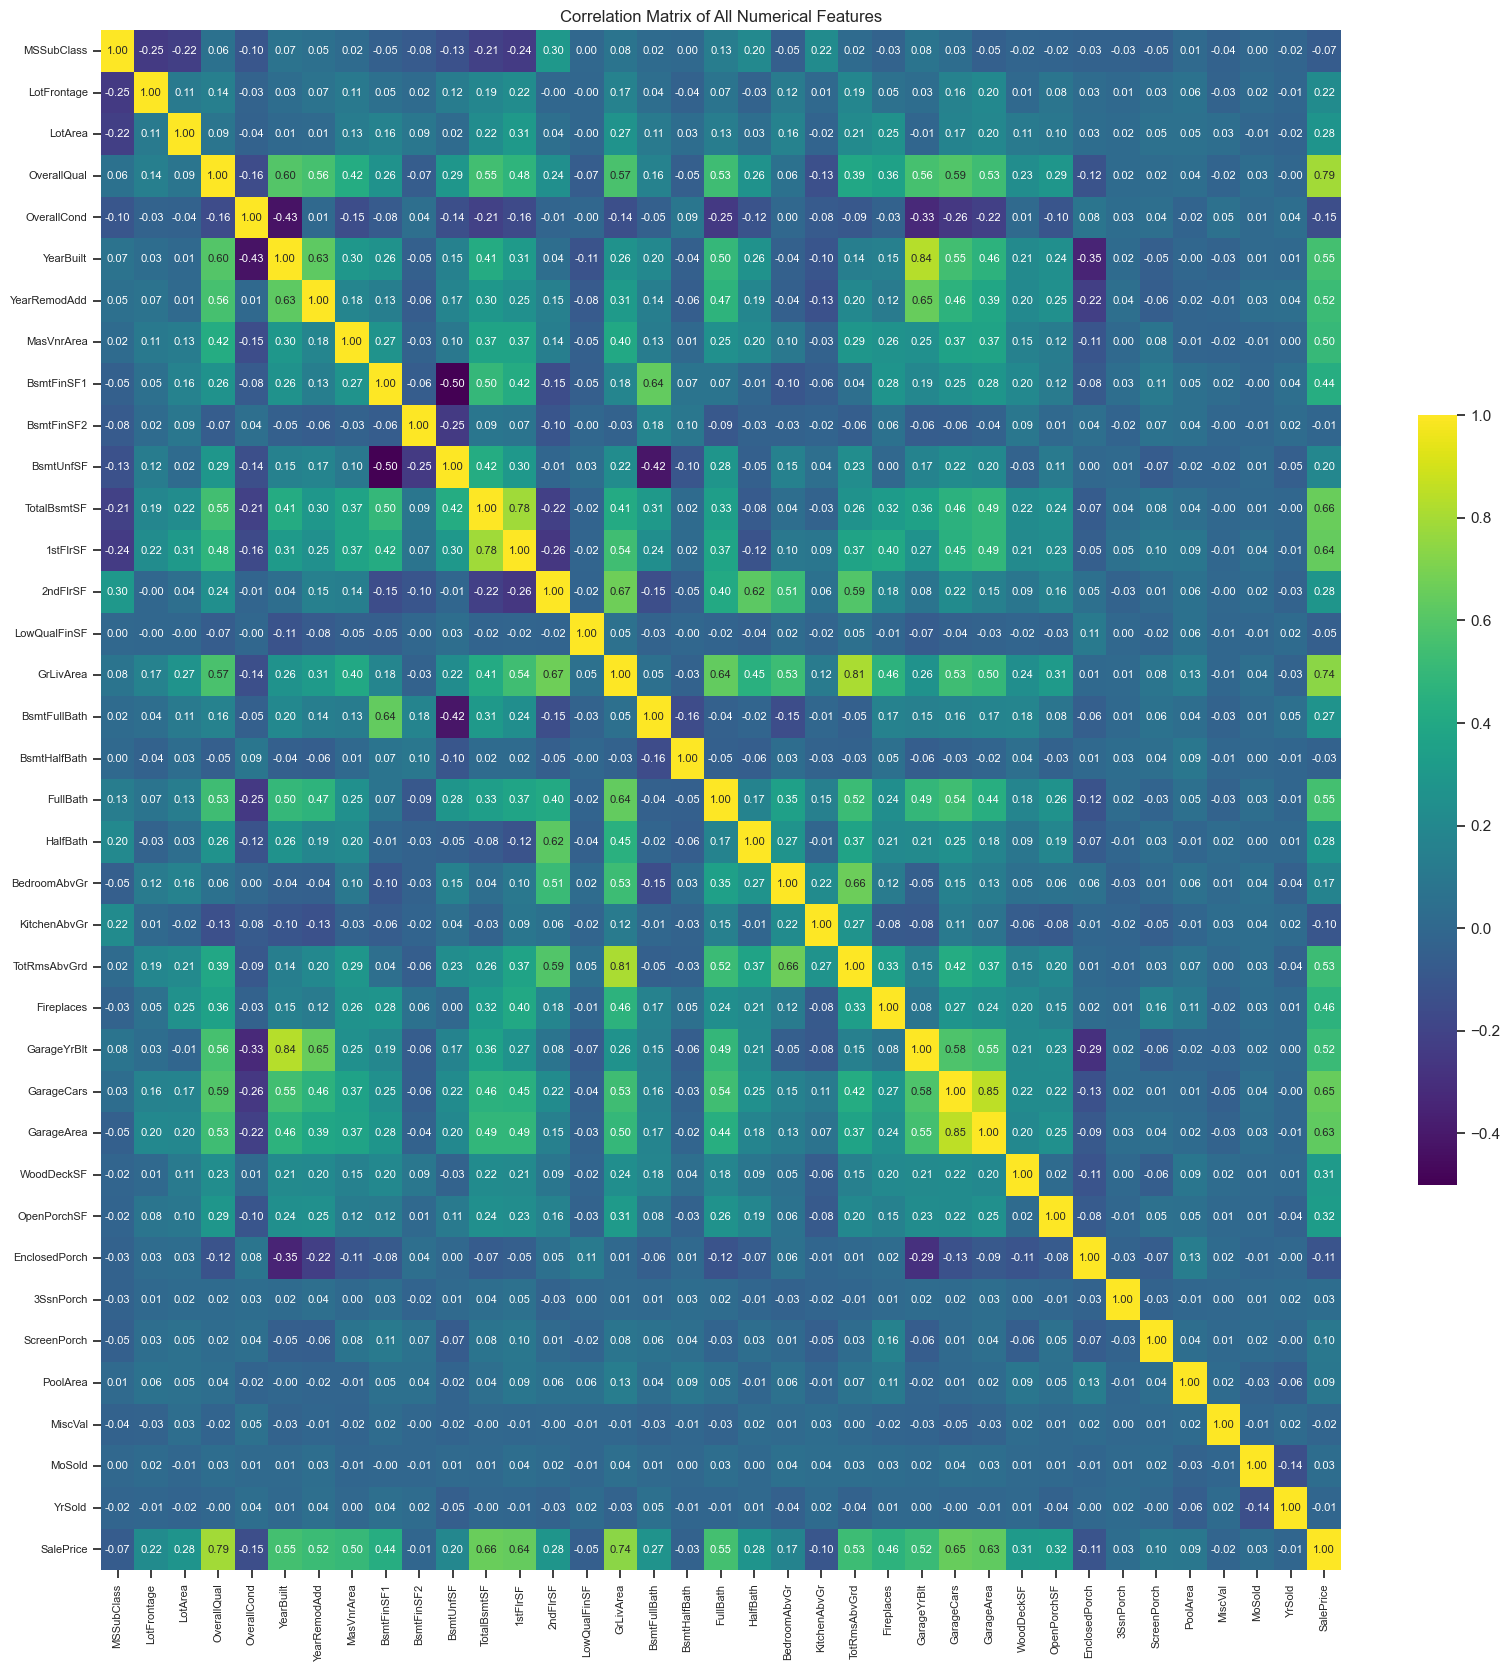

In [108]:
# Function to adjust tick labels
def adjust_tick_labels(ax):
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    for tick in ax.get_yticklabels():
        tick.set_rotation(0)

# Example usage in a heatmap with the selected correlation matrix
plt.figure(figsize=(20, 20))

# Plot the heatmap with adjusted annotation font size
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 8}, cmap='viridis', fmt=".2f",
            cbar_kws={'shrink': 0.5})  # Shrink the color bar

# Adjust tick labels
ax = plt.gca()
adjust_tick_labels(ax)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.title('Correlation Matrix of All Numerical Features')
plt.show()

- Since the Correlation Matrix is symmetrical:
- **Improved Heatmap Showing Only the Lower Triangle**


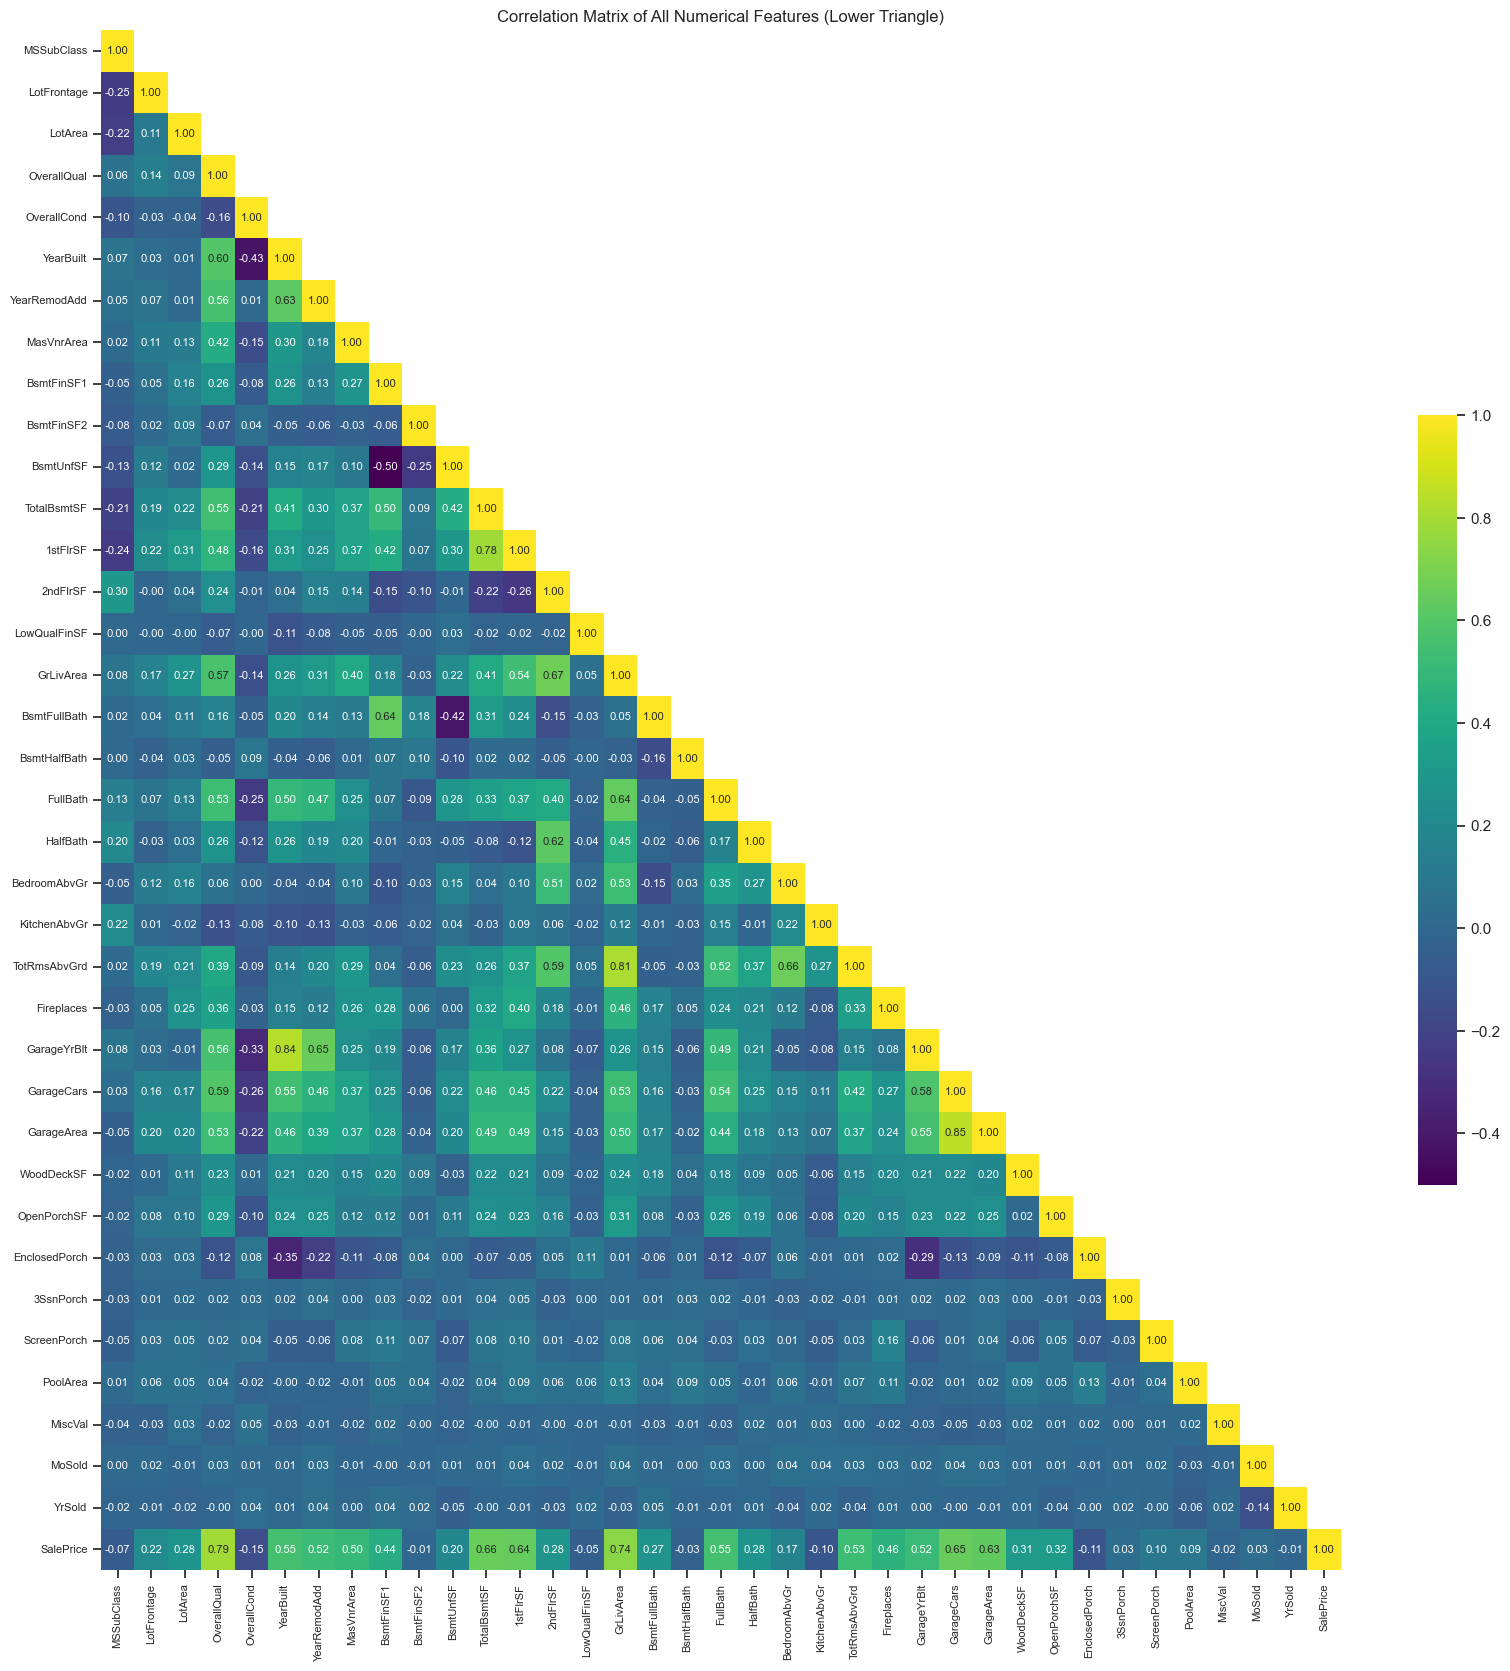

In [109]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Plot the heatmap with the mask
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, mask=mask, annot=True, annot_kws={"size": 8}, cmap='viridis', fmt=".2f",
            cbar_kws={'shrink': 0.5})  # Shrink the color bar

# Adjust tick labels
ax = plt.gca()
adjust_tick_labels(ax)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.title('Correlation Matrix of All Numerical Features (Lower Triangle)')
plt.show()

### 4. Data Processing and Feature Engineering
#### Feature Selection Using Random Forest
**1. One-Hot Encoding**

In [110]:
# One-hot encode categorical variables
train_df = pd.get_dummies(train_df, drop_first=True)

# Update numerical columns after one-hot encoding
numerical_cols = train_df.select_dtypes(include=[np.number]).columns

# Standardize numerical features
scaler = StandardScaler()
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])

**2. Model Training and Evaluation - Random Forest**

Random Forest Regressor Performance:
Mean Absolute Error (MAE): 14941.595322822823
Mean Squared Error (MSE): 791537840.477339


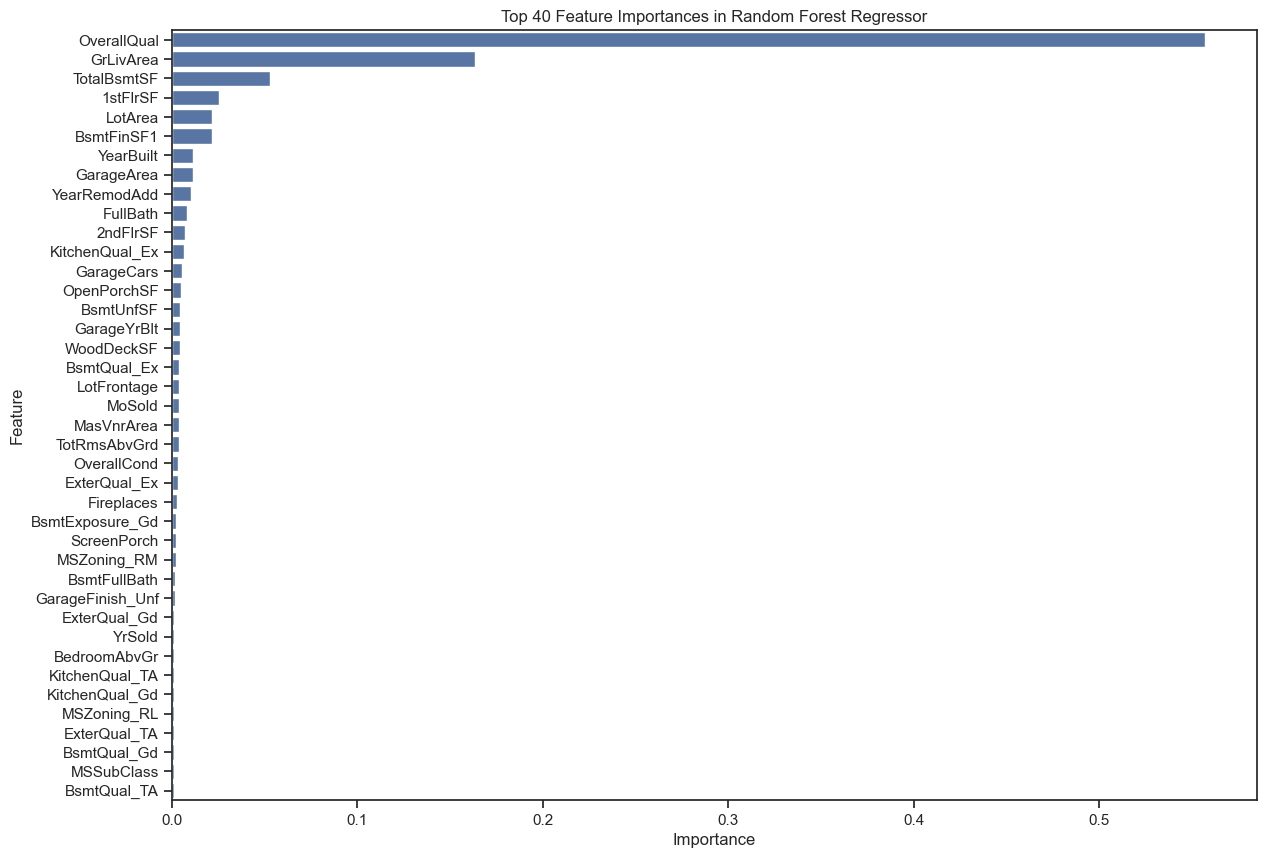

In [120]:
# Separate the target variable and features
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

# Define preprocessing for numerical data (impute missing values and scale)
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical data (impute missing values and one-hot encode)
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Define the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Display the results
print("Random Forest Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

# Evaluate feature importance
feature_importances = rf_model.feature_importances_

# Get feature names
onehot_features = list(preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(cat_cols))
all_features = num_cols + onehot_features

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(14, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(40))
plt.title('Top 40 Feature Importances in Random Forest Regressor')
plt.show()


When the preprocessing pipeline applies transformations like one-hot encoding, it generates new feature names based on the original categorical variables.
(i.e. Foundation -> Foundation_CBlock, or RoofStyle -> RoofStyle_Hip)
These new names include the original variable names with appended values, creating a more detailed representation.

To address this and create pair plots effectively, we need to:

- Identify the original feature names from the transformed dataset.
- Map the new feature names back to the original feature names.
- Use the top 30 features (or their respective original names) for the pair plot.

In [121]:
# Define the number of top features to select
num_features = 30  # You can change this number as needed

# Hyperparameter Tuning Using RandomizedSearchCV (unchanged)
from sklearn.model_selection import RandomizedSearchCV

# Define a more efficient parameter grid for quicker optimization
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Define the RandomizedSearchCV with fewer iterations
rf_random = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_grid,
                               n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV
rf_random.fit(X_train, y_train)

# Get the best parameters
best_params = rf_random.best_params_

# Train the final model with the best parameters
rf_optimized = RandomForestRegressor(**best_params)
rf_optimized.fit(X_train, y_train)

# Make predictions
y_pred_optimized = rf_optimized.predict(X_test)

# Evaluate the model
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)

# Display the results
print("Optimized Random Forest Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae_optimized}")
print(f"Mean Squared Error (MSE): {mse_optimized}")
print(f"Best Parameters: {best_params}")

# Evaluate feature importance
feature_importances = rf_optimized.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the top X features
top_X_features = feature_importances_df.head(num_features)['Feature'].tolist()
print(f"Top {num_features} Features:")
print(top_X_features)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Optimized Random Forest Regressor Performance:
Mean Absolute Error (MAE): 14888.179190551049
Mean Squared Error (MSE): 810159280.703538
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Top 30 Features:
['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'ExterQual_TA', 'GarageCars', 'BsmtQual_Ex', '1stFlrSF', 'FullBath', 'KitchenQual_Ex', 'LotArea', 'BsmtFinSF1', 'TotRmsAbvGrd', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', '2ndFlrSF', 'KitchenQual_TA', 'ExterQual_Gd', 'LotFrontage', 'ExterQual_Ex', 'OpenPorchSF', 'Foundation_PConc', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'GarageFinish_Unf', 'BsmtQual_TA', 'WoodDeckSF']


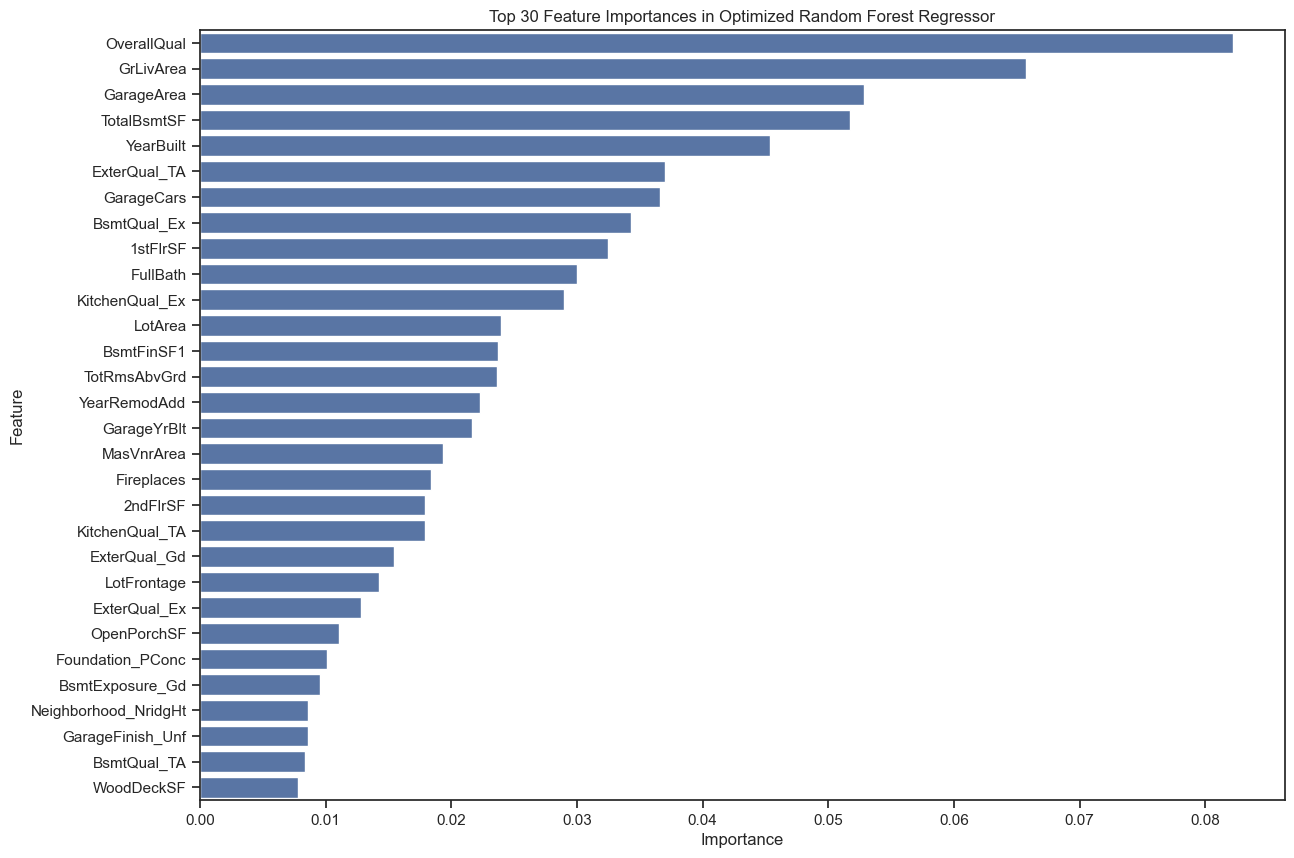

Filtered Top Original Features for Pair Plot:
['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'ExterQual', 'GarageCars', 'BsmtQual', '1stFlrSF', 'FullBath', 'KitchenQual', 'LotArea', 'BsmtFinSF1', 'TotRmsAbvGrd', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', '2ndFlrSF', 'LotFrontage', 'OpenPorchSF', 'Foundation', 'BsmtExposure', 'Neighborhood', 'GarageFinish', 'WoodDeckSF', 'SalePrice']


In [122]:
# Plot feature importances
plt.figure(figsize=(14, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(num_features))
plt.title(f'Top {num_features} Feature Importances in Optimized Random Forest Regressor')
plt.show()

# Map the new feature names back to the original feature names
original_features = []
for feature in top_X_features:
    if '_' in feature:
        original_features.append(feature.split('_')[0])
    else:
        original_features.append(feature)

# Remove duplicates while preserving order
original_features = list(dict.fromkeys(original_features))

# Check if the original features exist in the dataframe and filter
filtered_features = [feature for feature in original_features if feature in train_df.columns]

# Add SalePrice to the list of top original features
filtered_features.append('SalePrice')

print("Filtered Top Original Features for Pair Plot:")
print(filtered_features)

In [ ]:
# Pair plot for the filtered top original features
#sns.set_theme(style="ticks")
#sns.pairplot(train_df[filtered_features], height=2.5)
#plt.show()